In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import gaussian
from scipy.signal import convolve2d as conv2

In [2]:
def gaussian_kernel(size, sigma):
    kernel_1d = gaussian(size, std=sigma).reshape(size, 1)
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    return kernel_2d

In [3]:
def show_gallery(images, main_title, titles=['filter','original','conv']):
    fig=plt.figure()
    
    if len(images) != len(titles):
        raise Exception('Images and titles must be of the same length')

    for i, image in enumerate(images):
        ax=fig.add_subplot(3,len(images),i+1)  
        ax.title.set_text(titles[i])
        plt.gcf().set_size_inches(12,12)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray)
    fig.suptitle(main_title)
    plt.show()

In [4]:
def plot(image, mode, main_title):
    fig=plt.figure()
    plt.imshow(image,cmap=mode)
    fig.suptitle(main_title)
    plt.show()

In [5]:
def read_image(filename, mode=cv2.COLOR_BGR2GRAY):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, mode)
    return image

In [6]:
image = read_image('pentagon.tiff')

1) CONVOLUCION LINEAL A FILTRO DE PASO BAJAS (GAUSSIANO)

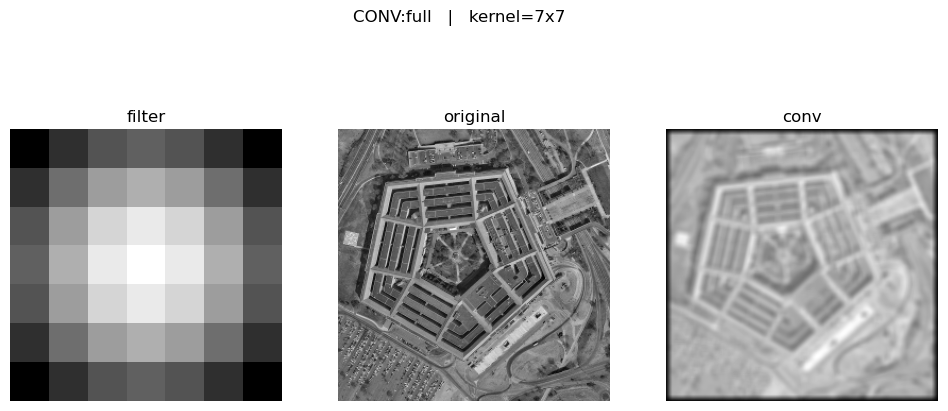

In [7]:
'''Caso para filtro de tamaño 7x7'''
gauss_kernel = gaussian_kernel(7,3)
filtered_image = conv2(gauss_kernel, image, 'full')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:full   |   kernel=7x7')

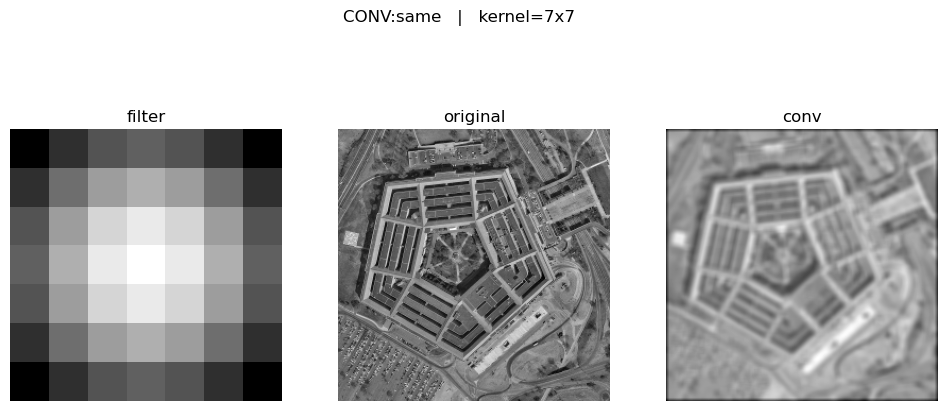

In [8]:
'''Caso para filtro de tamaño 7x7'''
gauss_kernel = gaussian_kernel(7,3)
filtered_image = conv2(image, gauss_kernel, 'same')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:same   |   kernel=7x7')

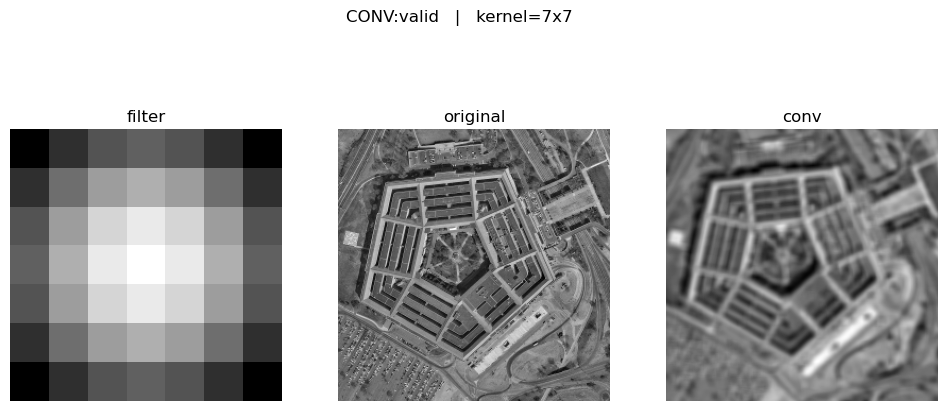

In [9]:
'''Caso para filtro de tamaño 7x7'''
gauss_kernel = gaussian_kernel(7,3)
filtered_image = conv2(image, gauss_kernel, 'valid')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:valid   |   kernel=7x7')

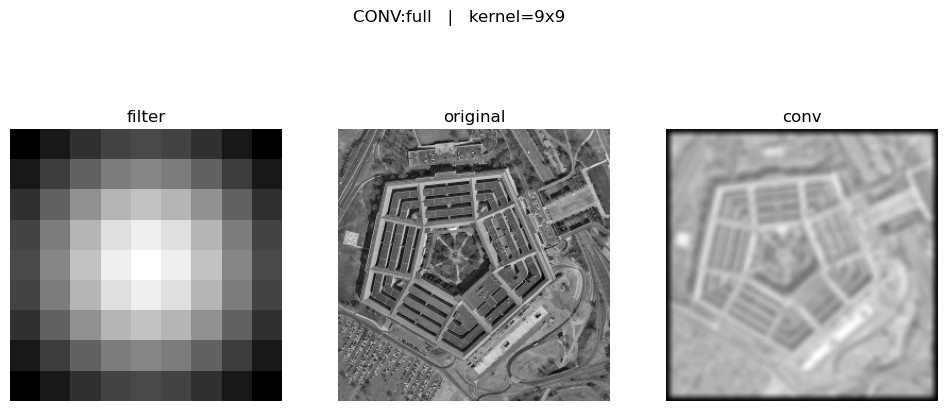

In [10]:
'''Caso para filtro de tamaño 9x9'''
gauss_kernel = gaussian_kernel(9,3)
filtered_image = conv2(image, gauss_kernel, 'full')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:full   |   kernel=9x9')

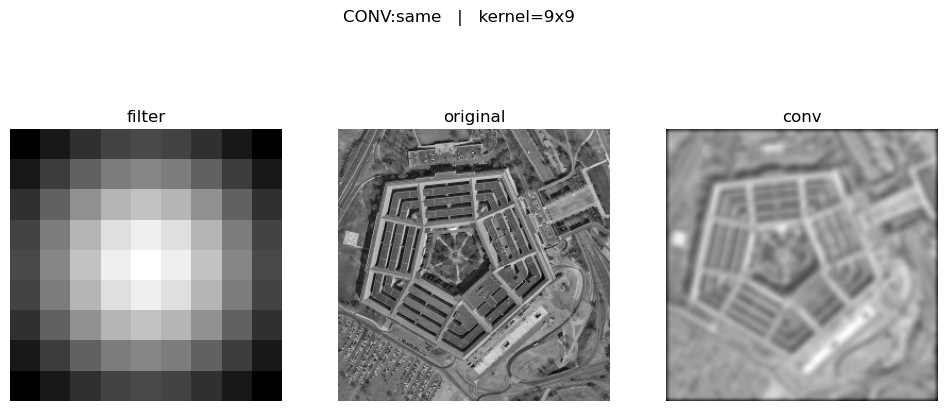

In [11]:
'''Caso para filtro de tamaño 9x9'''
gauss_kernel = gaussian_kernel(9,3)
filtered_image = conv2(image, gauss_kernel, 'same')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:same   |   kernel=9x9')

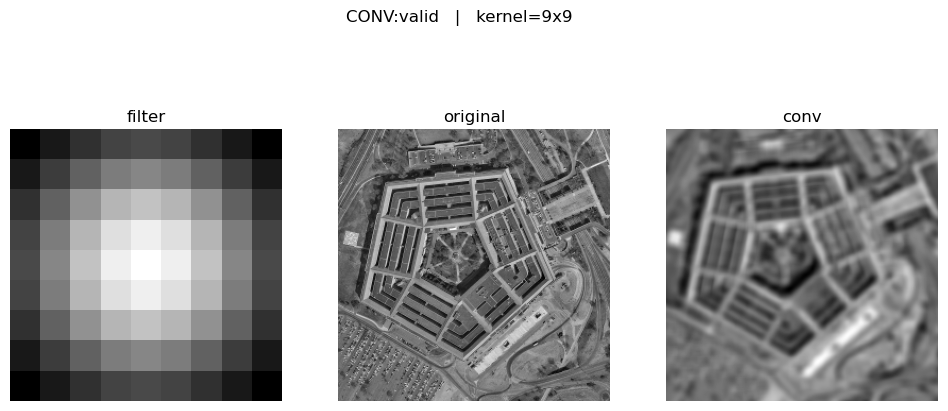

In [12]:
'''Caso para filtro de tamaño 9x9'''
gauss_kernel = gaussian_kernel(9,3)
filtered_image = conv2(image, gauss_kernel, 'valid')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:valid   |   kernel=9x9')

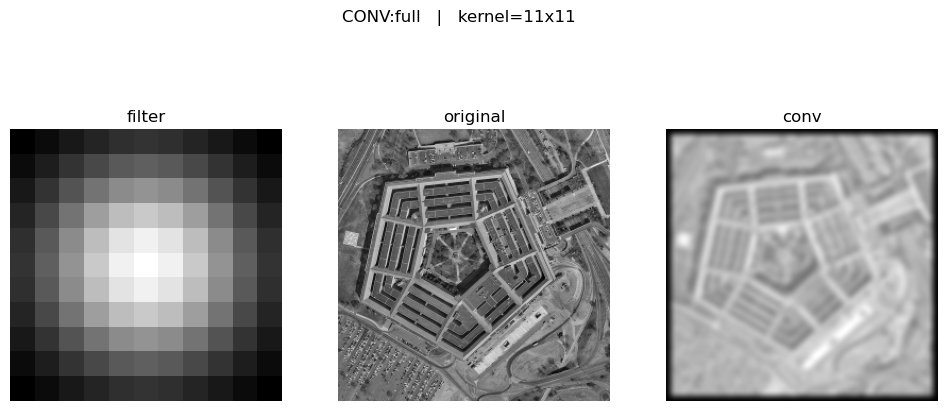

In [13]:
'''Caso para filtro de tamaño 11x11'''
gauss_kernel = gaussian_kernel(11,3)
filtered_image = conv2(image, gauss_kernel, 'full')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:full   |   kernel=11x11')

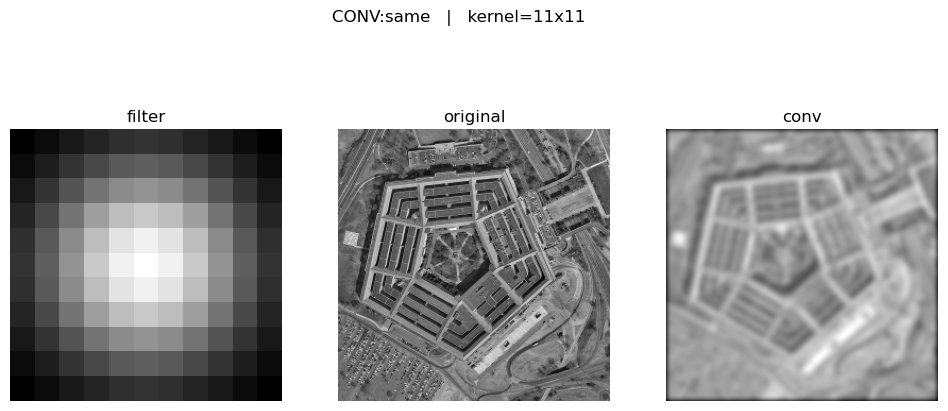

In [14]:
'''Caso para filtro de tamaño 11x11'''
gauss_kernel = gaussian_kernel(11,3)
filtered_image = conv2(image, gauss_kernel, 'same')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:same   |   kernel=11x11')

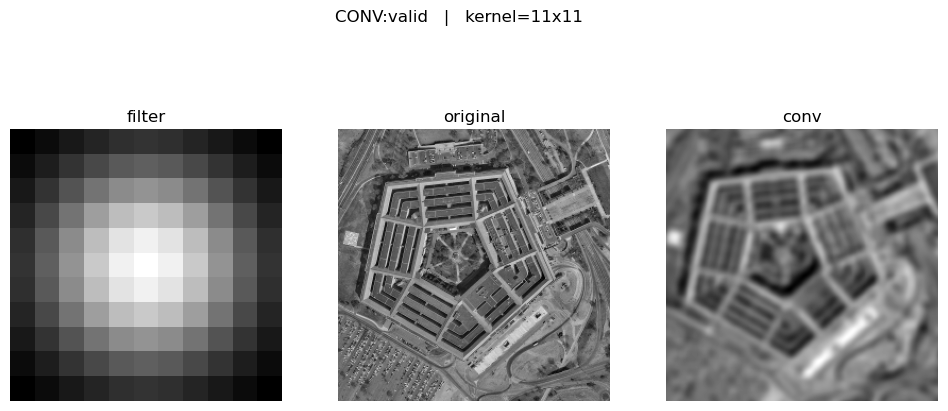

In [15]:
'''Caso para filtro de tamaño 11x11'''
gauss_kernel = gaussian_kernel(11,3)
filtered_image = conv2(image, gauss_kernel, 'valid')
show_gallery([gauss_kernel, image, filtered_image], 'CONV:valid   |   kernel=11x11')

2. Obtener la DFT de la imagen original y desplegarla de manera amplificada utilizando el logaritmo del módulo
de la DFT para dicha amplificación. Cambiar el eje de coordenadas (comando MATLAB fftshift) y nuevamente
amplificar.

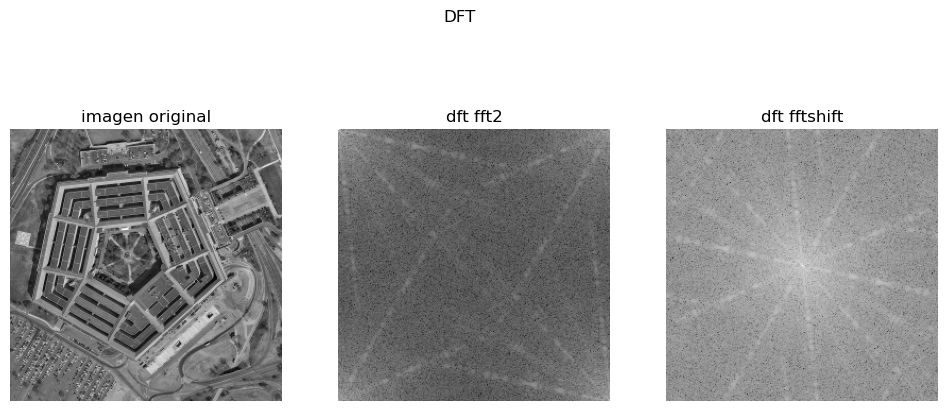

In [16]:
'''Obteniendo la DFT de la imagen original'''

image_dft = np.log10(np.abs(np.fft.fft2(image)))
image_dft_fftshift = np.log10(np.abs(np.fft.fftshift(image_dft)))

show_gallery(
    images=[image, image_dft, image_dft_fftshift], 
    main_title='DFT', 
    titles=['imagen original', 'dft fft2', 'dft fftshift']
    )

3. Obtener la convolución circular (⊗) de la imagen con el filtro paso bajas a través de la DFT. Usar también
diferentes tamaños de filtros. Desplegar las imágenes resultantes.

In [17]:
'''
Tomemos en cuenta que la convulucion circular de dos señales discretas es equivalente a la multiplicacion de las DFT 
de las señaeles discretas. Tenemos que tener en cuenta el tamaño de ambas imagenes!
'''
image = read_image('pentagon.tiff')

def circ_conv(image, kernel_size, sigma): 
    #calculando la dft de la señal con el filtro
    gauss_kernel = gaussian_kernel(kernel_size,sigma) 
    print(gauss_kernel.shape)
    d,r = divmod(gauss_kernel.shape[0],2)
    pc = int((image.shape[0]//2) - d - r)   
    kernel_pad = np.pad(gauss_kernel, ((pc,pc+r),(pc,pc+r)),'constant' )  #añadiendo padding

    kernel_dft = np.fft.fftshift(np.fft.fft2(kernel_pad))
    image_dft = np.fft.fftshift(np.fft.fft2(image))
        
    print(kernel_dft.shape)
    print(image_dft.shape)
    
    circular_conv = image_dft * kernel_dft

    circular_conv_image = np.fft.ifftshift(np.fft.ifft2(circular_conv))
    
    show_gallery(
        images=[np.log(np.abs(image_dft)), np.log(np.abs(kernel_dft)), np.log(np.abs(circular_conv))],
        main_title=f'Circular Convolution DFT\'s for {kernel_size}x{kernel_size}',
        titles=['original image dft', 'kernel dft no padding', 'circular_conv']
        )

    show_gallery(
        images=[image,np.log(np.abs(circular_conv_image))],
        main_title=f'Original vs Circular Convolution DFT\'s for {kernel_size}x{kernel_size} and sigma={sigma}',
        titles=['original image', 'circular_conv']
    )
    #plot(np.log(np.abs(circular_conv_image)),plt.cm.gray , 'circular_convolution')

(7, 7)
(256, 256)
(256, 256)


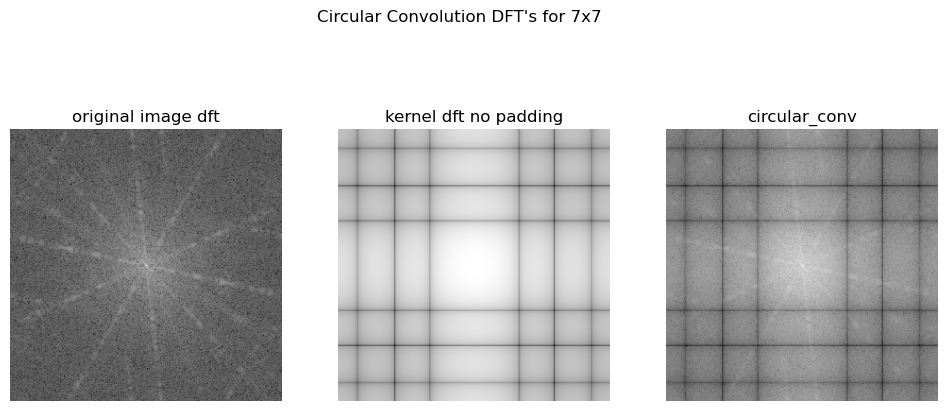

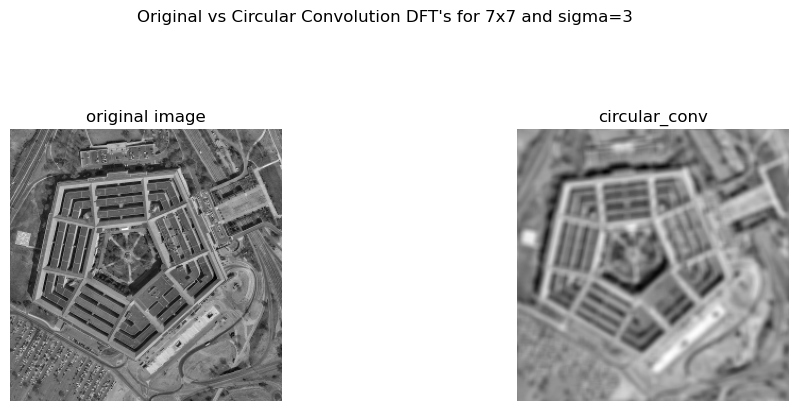

In [18]:
circ_conv(image, 7, 3)

(9, 9)
(256, 256)
(256, 256)


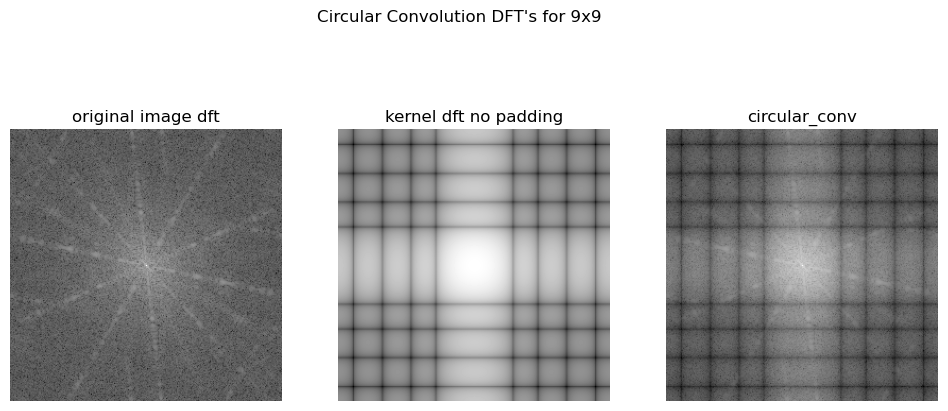

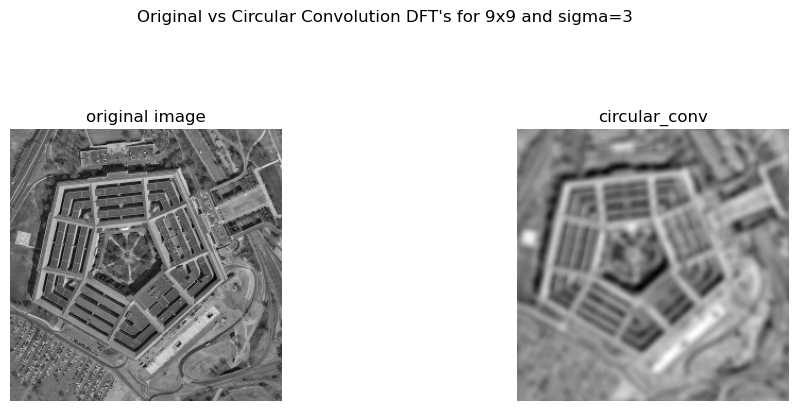

In [19]:
circ_conv(image, 9, 3)

(11, 11)
(256, 256)
(256, 256)


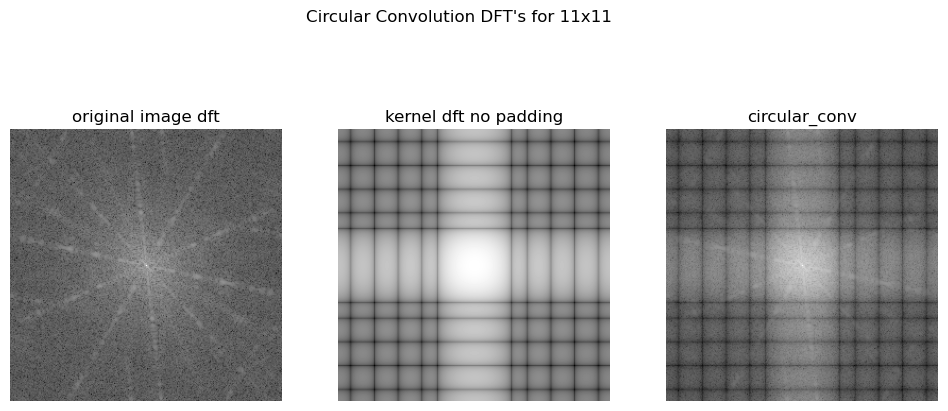

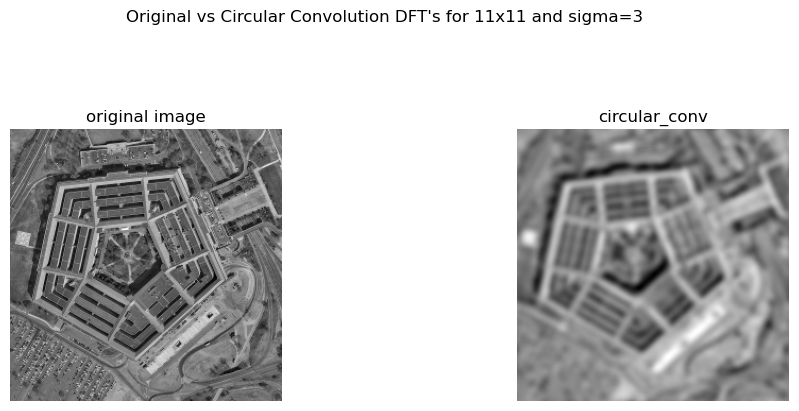

In [20]:
circ_conv(image, 11, 3)

(15, 15)
(256, 256)
(256, 256)


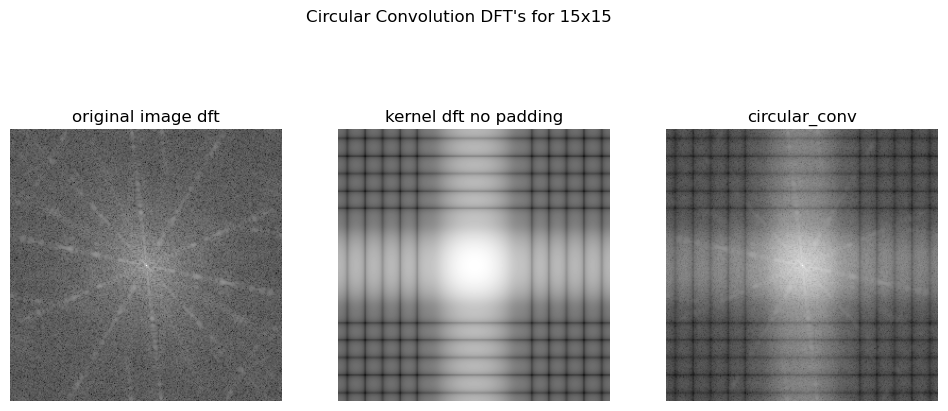

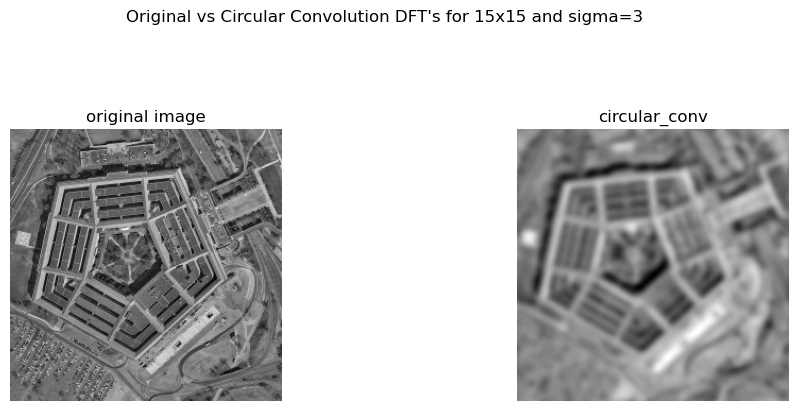

In [21]:
circ_conv(image, 15, 3)

4. Obtener la convolución lineal (∗) de la imagen con el filtro paso bajas a través de la DFT (comandos MATLAB
fft2 y ifft2). Usar también diferentes tamaños de filtros. Desplegar las imágenes resultantes. (Recordar que f(x)⊗
h(x) ←→F F(k)×H(k) y ∗ 6= ⊗)

In [38]:
'''
'''
image = read_image('pentagon.tiff')

def linear_conv(image, kernel_size, sigma): 
    #calculando la dft de la señal con el filtro
    gauss_kernel = gaussian_kernel(kernel_size,sigma) 
    print(gauss_kernel.shape)
    pc = (image.shape[0] + gauss_kernel.shape[0] - 1)
    print(pc)
    ipc = (pc-image.shape[0])//2
    kpc,r = divmod(pc-gauss_kernel.shape[0],2)
    kernel_pad = np.pad(gauss_kernel, ((kpc,kpc+r),(kpc,kpc+r)),'constant' )  #añadiendo padding
    image_pad = np.pad(image, ((ipc,ipc),(ipc,ipc)),'constant' )  #añadiendo padding


    kernel_dft = np.fft.fftshift(np.fft.fft2(kernel_pad))
    image_dft = np.fft.fftshift(np.fft.fft2(image_pad))
        
    print(kernel_dft.shape)
    print(image_dft.shape)
    
    linear_conv = image_dft * kernel_dft
    linear_conv_image = np.fft.ifftshift(np.fft.ifft2(linear_conv))
    
    show_gallery(
        images=[np.log(np.abs(image_dft)), np.log(np.abs(kernel_dft)), np.log(np.abs(linear_conv))],
        main_title=f'Linear Convolution DFT\'s for {kernel_size}x{kernel_size}',
        titles=['original image dft', 'kernel dft no padding', 'linear_conv']
        )

    show_gallery(
        images=[image,np.log(np.abs(linear_conv_image))],
        main_title=f'Original vs Linear Convolution DFT\'s for {kernel_size}x{kernel_size} and sigma={sigma}',
        titles=['original image', 'linear_conv']
    )
    #plot(np.log(np.abs(circular_conv_image)),plt.cm.gray , 'circular_convolution')

(7, 7)
262
(262, 262)
(262, 262)


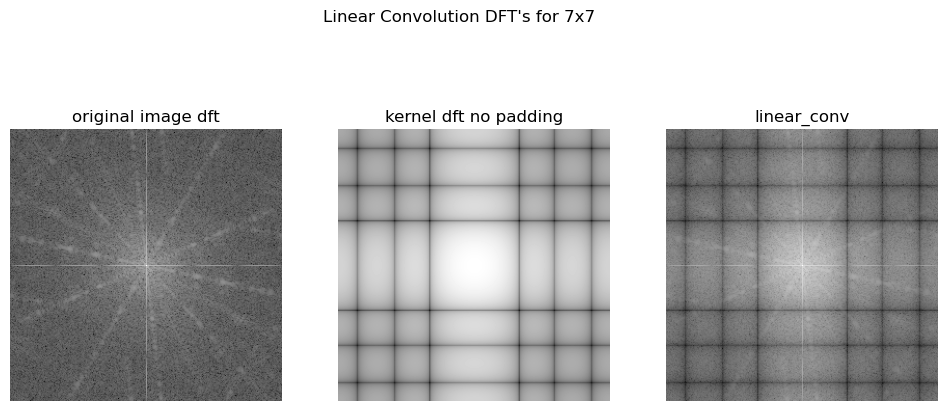

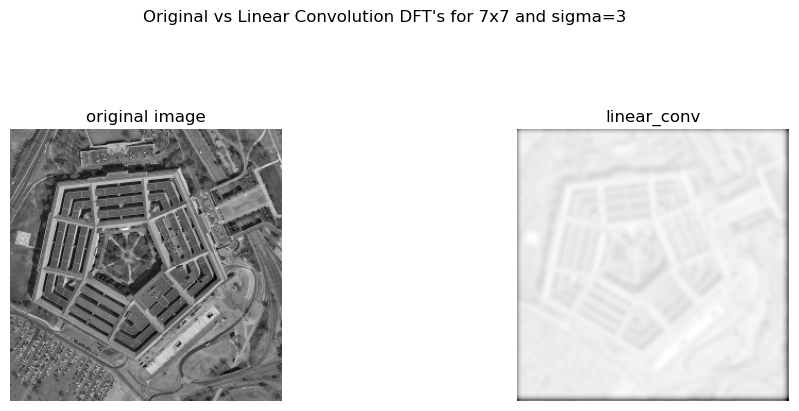

In [39]:
linear_conv(image, 7, 3)

(9, 9)
264
(264, 264)
(264, 264)


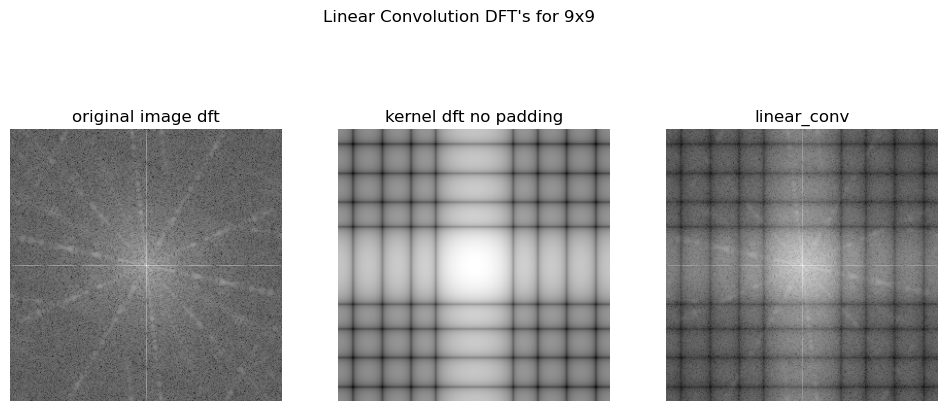

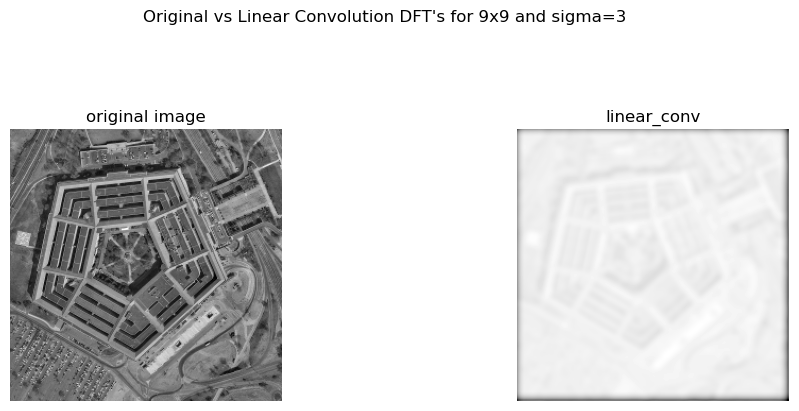

In [40]:
linear_conv(image, 9, 3)

(11, 11)
266
(266, 266)
(266, 266)


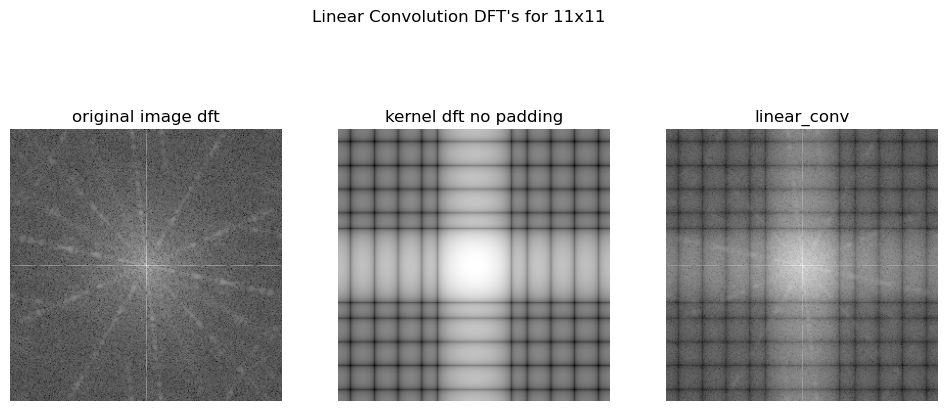

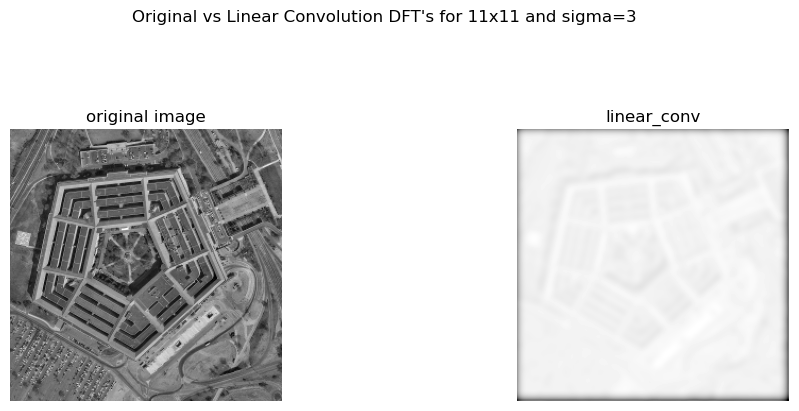

In [41]:
linear_conv(image, 11, 3)